In [1]:
LIP_data = load('./reconstruction_output/summary_output.txt');

In [2]:
rng(1) % Seed random numbers so results are reproducible

In [3]:
col={[31 119 180]/255,[255 127 14]/255,[44 160 44]/255,[214 39 40]/255};

In [4]:
decay1_all =LIP_data(:,5)/max(LIP_data(:,5)); % total area decay1 scenario
decay1_tropical = LIP_data(:,6)/max(LIP_data(:,6));  % tropical (<15º) area decay1 scenario

decay1_burial_all =LIP_data(:,7)/max(LIP_data(:,7)); % total area decay1+burial scenario
decay1_burial_tropical = LIP_data(:,8)/max(LIP_data(:,8));  % tropical (<15º) area decay1+burial scenario

decay2_burial_all =LIP_data(:,11)/max(LIP_data(:,11)); % total area decay2+burial scenario
decay2_burial_tropical = LIP_data(:,12)/max(LIP_data(:,12));  % tropical (<15º) area decay2+burial scenario

In [5]:
ice=LIP_data(:,1:2);
icenorm=ice(:,2)/max(ice(:,2));  % Scale ice from 0-1
icelat_real=flipud(ice(:,2));  %Flip time series to start at 520 Ma
time=-1*ice(:,1);  %Use negative numbers for past times

In [6]:
%Flip time series to start at 520 Ma
flip_decay1_all = flipud(decay1_all);
flip_decay1_tropical=flipud(decay1_tropical);
flip_decay1_burial_all=flipud(decay1_burial_all);
flip_decay1_burial_tropical=flipud(decay1_burial_tropical);
flip_decay2_burial_all=flipud(decay2_burial_all);
flip_decay2_burial_tropical=flipud(decay2_burial_tropical);

_________________________________________________________________________________
Percent of record with LIP >20% of max: decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)

ans =

   60.9524   43.8095   49.5238   22.8571   83.8095   40.0000



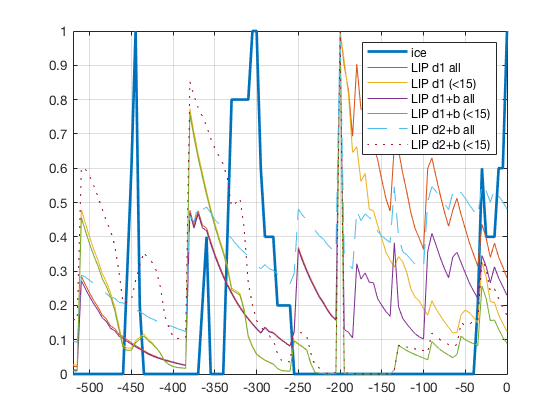

In [7]:
% Identify true(1)/false(0) whether sutures are present at each time step
% Only count LIP that are at least 20% as extensize as max
bin_decay1_all=flipud(decay1_all)'>0.2;
bin_decay1_tropical=flipud(decay1_tropical)'>0.2;
bin_decay1_burial_all=flipud(decay1_burial_all)'>0.2;
bin_decay1_burial_tropical=flipud(decay1_burial_tropical)'>0.2;
bin_decay2_burial_all=flipud(decay2_burial_all)'>0.2;
bin_decay2_burial_tropical=flipud(decay2_burial_tropical)'>0.2;

disp('_________________________________________________________________________________')
disp('Percent of record with LIP >20% of max: decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)')
100/length(LIP_data)*[sum(bin_decay1_all) sum(bin_decay1_tropical) sum(bin_decay1_burial_all) sum(bin_decay1_burial_tropical) sum(bin_decay2_burial_all) sum(bin_decay2_burial_tropical)]

figure(50)
plot(time, icenorm,'LineWidth',2)
hold on
plot(time, decay1_all)
plot(time, decay1_tropical)
plot(time, decay1_burial_all)
plot(time, decay1_burial_tropical)
plot(time, decay2_burial_all,'--')
plot(time, decay2_burial_tropical,':')
hold off
legend('ice','LIP d1 all','LIP d1 (<15)','LIP d1+b all','LIP d1+b (<15)','LIP d2+b all','LIP d2+b (<15)')
axis tight
grid on

In [8]:
% Correlation calculations for real data

% Correlation coefficients between ice extent and suture lengths
cc=corrcoef(icelat_real,flip_decay1_all);
cc_real_decay1_all=cc(1,2);
cc=corrcoef(icelat_real,flip_decay1_tropical);
cc_real_decay1_tropical=cc(1,2);
cc=corrcoef(icelat_real,flip_decay1_burial_all);
cc_real_decay1_burial_all=cc(1,2);
cc=corrcoef(icelat_real,flip_decay1_burial_tropical);
cc_real_decay1_burial_tropical=cc(1,2);
cc=corrcoef(icelat_real,flip_decay2_burial_all);
cc_real_decay2_burial_all=cc(1,2);
cc=corrcoef(icelat_real,flip_decay2_burial_tropical);
cc_real_decay2_burial_tropical=cc(1,2);

disp('Correlation between ice extent and LIP length [decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)]')
[cc_real_decay1_all cc_real_decay1_tropical cc_real_decay1_burial_all cc_real_decay1_burial_tropical cc_real_decay2_burial_all cc_real_decay2_burial_tropical]

Correlation between ice extent and LIP length [decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)]

ans =

   -0.2584   -0.1901   -0.0805    0.0150    0.0307    0.1235



In [9]:
%%  Identify glaciated and unglaciated intervals


% Identify true(1)/false(0) whether ice is present at each time step
% Only count ice extent at least 10 degrees from poles
binice=flipud(ice(:,2))'>10;
disp(['Percent of record with ice extent > 10^o is ' num2str(100*sum(binice)/length(ice))])
disp('')

% Identify/measure durations of glaciated and unglaciated intervals 
% CAUTION: Code assumes that there are 4 identified glaciations

tempbinice=binice;  % true(1)/false(0) whether ice is present
tempice=flipud(ice(:,2))';  % latitude extent of ice
for i=1:4
    ind=min(find(tempbinice==1)); % Find first instance of ice
    no_ice_dur(i)=ind-1;          % Duration of first unglaciated interval
    tempbinice=tempbinice(ind:end);  %Remove identified portion from temp record
    tempice=tempice(ind:end);        %Remove identified portion from temp record
    if i<4
        ind=min(find(tempbinice==0));  % Find next time without ice
        ice_lat{i}=tempice(1:ind-1);   % ice extent within glaciated interval
        ice_dur(i)=ind-1;              % duration of glaciated interval
        tempbinice=tempbinice(ind:end); %Remove identified portion from temp record
        tempice=tempice(ind:end);
    else
        ice_dur(i)=length(tempbinice);  % duration of last glaciated interval
        ice_lat{i}=tempice(1:end);      % ice extent within last glaciated interval
    end
end
ice_lat_real=ice_lat; 

disp('Number of 5-Myr time steps in each ice age (1st line) & between ice ages (2nd line)')
[ice_dur; no_ice_dur]

Ngap=sum(no_ice_dur);  % Total time steps without ice
pctice=sum(ice_dur)/105;  %Percent of time with ice present

% Calculate overlap between presence ice and sutures
ovlp_decay1_all=sum(binice.*bin_decay1_all);
ovlp_decay1_tropical=sum(binice.*bin_decay1_tropical);
ovlp_decay1_burial_all=sum(binice.*bin_decay1_burial_all);
ovlp_decay1_burial_tropical=sum(binice.*bin_decay1_burial_tropical);
ovlp_decay2_burial_all=sum(binice.*bin_decay2_burial_all);
ovlp_decay2_burial_tropical=sum(binice.*bin_decay2_burial_tropical);

disp('Ice-LIP overlap as percent of time glaciated (ice>10) [decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)]')
100/sum(binice)*[ovlp_decay1_all ovlp_decay1_tropical ovlp_decay1_burial_all ovlp_decay1_burial_tropical ovlp_decay2_burial_all ovlp_decay2_burial_tropical]
disp('Ice-LIP overlap as percent of time LIP >20% of modern [decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)]')
100*[ovlp_decay1_all/sum(bin_decay1_all) ovlp_decay1_tropical/sum(bin_decay1_tropical) ovlp_decay1_burial_all/sum(bin_decay1_burial_all)...
    ovlp_decay1_burial_tropical/sum(bin_decay1_burial_tropical) ovlp_decay2_burial_all/sum(bin_decay2_burial_all) ovlp_decay2_burial_tropical/sum(bin_decay2_burial_tropical)]

Percent of record with ice extent > 10^o is 21.9048
Number of 5-Myr time steps in each ice age (1st line) & between ice ages (2nd line)

ans =

     7    12     1    16
     0    49     4    16

Ice-LIP overlap as percent of time glaciated (ice>10) [decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)]

ans =

   47.8261   39.1304   47.8261   30.4348   86.9565   69.5652

Ice-LIP overlap as percent of time LIP >20% of modern [decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)]

ans =

   17.1875   19.5652   21.1538   29.1667   22.7273   38.0952



In [10]:
%% Create simulated climate records by re-arranging ice intervals

% Simulations will be used to test the hypothesis that ice ages are
% NOT related to suture length. Therefore, climate simulations are
% designed to generate uniform probability for 4 ice ages occuring
% at anytime throughout the last 520 Myr

% clear memory for variables created within loop
all_sim=[]; all_gap=[]; all_end=[]; all_lat=[];
ovlp_sim=[]; cc_sim=[]; allstart=[];

ITER=10000; % Number of Monte carlo simulations (use 10,000 or 20,000)

for j=1:ITER
    ice_lat=ice_lat_real;  % create copy of ice latitude extent
    iceflip=randi(2,1,4);  % 50% chance of mirror-image for lat extent variation
    for i=1:4
        if iceflip(i)==1
            ice_lat{i}=fliplr(ice_lat_real{i});
        end
    end
    
    iceorder=randperm(4);  % pick random order for ice intervals
    
    % clear variables used to create climate simulation
    simi=[]; sim=[]; simlat=[];

    % Percent of time with ice determines chance of ice at start or end of record
    endstate=(rand(1,2) < pctice); 
    all_end(j,:)=endstate; %save endstate results 
    
    if sum(endstate)>=1 % If record starts OR ends in a glacial state
        
        % If starting with ice, 40 percent chance simulation starts midway through an ice age
        % In which case ice age wraps around (i.e., one portion at start of
        % simulation and the rest at end of simulation)
        if rand <.4 && ice_dur(iceorder(1))>1 
            startdur=randi(ice_dur(iceorder(1))-1);  % Pick which time step in the glaciated interval
        
        % If not starting midway through glaciation, 50 percent chance ice age is at start of simulation
        elseif rand < .5 
            startdur=0;  %starts in non-glacial state and ends with ice
        else   
            startdur=ice_dur(iceorder(1)); %starts with full duration of an ice age
        end
        
        % Begin constructing climate simulation
        
        if startdur>0  % If simulation starts with an ice age, apend duration/latitude of ice
            simi=[simi startdur];
            sim=[sim ones(1,startdur)];
            simlat=[simlat ice_lat{iceorder(1)}(end-startdur+1:end)];
        end

        allstart(end+1,:)=[iceorder(1) startdur]; %save info about initial ice age
        
        rn=lognrnd(0,1,1,4);  %Generate log-normal wait times between ice ages
        rand_gap=round(Ngap*rn/sum(rn));  %Scale wait time sum to total non-glaciated timespan
        
        % Small adjustment if rounding doesn't produce correct sum
        rand_gap(2)=rand_gap(2)-(sum(rand_gap)-Ngap); 
        while min(rand_gap)<=0 % repeat if adjustment produces a negative wait time
            rn=lognrnd(0,1,1,4);
            rand_gap=round(Ngap*rn/sum(rn));
            rand_gap(2)=rand_gap(2)-(sum(rand_gap)-Ngap);
        end
        
        for i=1:3  % Append subsequent non-glacial and glacial intervals
            simi=[simi rand_gap(i) ice_dur(iceorder(i+1))];
            sim=[sim zeros(1,rand_gap(i)) ones(1,ice_dur(iceorder(i+1)))];
            simlat=[simlat zeros(1,rand_gap(i)) ice_lat{iceorder(i+1)}];
        end
        
        % If starting with non-glacial state or starting midway through glacial interval 
        % add glacial state to end of simulation 
        %(remaining portion if starting midway through)
        if startdur < ice_dur(iceorder(1)) 
            simi=[simi rand_gap(4) ice_dur(iceorder(1))-startdur]; 
            sim=[sim zeros(1,rand_gap(4)) ones(1,ice_dur(iceorder(1))-startdur)];
            simlat=[simlat zeros(1,rand_gap(4)) ice_lat{iceorder(1)}(1:end-startdur)];
        
        else % otherwise end in non-glacial state
            simi=[simi rand_gap(4)];
            sim=[sim zeros(1,rand_gap(4))];
            simlat=[simlat zeros(1,rand_gap(4))];
        end

    
    else  % If simulation starts AND ends in non-glacial state
        
        rn=lognrnd(0,1,1,5); % create log-normal wait times for 5 non-glacial intervals
        rand_gap=round(Ngap*rn/sum(rn));
        % Small adjustment if rounding doesn't produce correct sum
        rand_gap(2)=rand_gap(2)-(sum(rand_gap)-Ngap);
        while min(rand_gap)<=0 % repeat if adjustment produces a negative wait time
            rn=lognrnd(0,1,1,5);
            rand_gap=round(Ngap*rn/sum(rn));
            rand_gap(2)=rand_gap(2)-(sum(rand_gap)-Ngap);
        end
        
        % Append successive non-glacial and glacial intervals
        for i=1:4
            simi=[simi rand_gap(i) ice_dur(iceorder(i))];
            sim=[sim zeros(1,rand_gap(i)) ones(1,ice_dur(iceorder(i)))];
            simlat=[simlat zeros(1,rand_gap(i)) ice_lat{iceorder(i)}];
        end
        % add last non-glacial state
        simi(end+1)=rand_gap(5);
        sim=[sim zeros(1,rand_gap(5))];
        simlat=[simlat zeros(1,rand_gap(5))];
    end
    % end construction of climate simulation
    
    % check that simulation has correct total length or print an error
    if length(simlat)~=105
        disp(['Error simulation length =' num2str(sum(simi))])
        disp(['Error simulation length =' num2str(length(simlat))])
        sim=sim(1:105);
    end
    
    % add simulation to matrix containing all simulations
    simice=sim;
    all_sim(j,:)=simice;
    all_lat(j,:)=simlat;
    
    % calculate overlap between simulated ice and real suture data
    ovlp_sim_decay1_all(j)=sum(simice.*bin_decay1_all);
    ovlp_sim_decay1_tropical(j)=sum(simice.*bin_decay1_tropical);
    ovlp_sim_decay1_burial_all(j)=sum(simice.*bin_decay1_burial_all);
    ovlp_sim_decay1_burial_tropical(j)=sum(simice.*bin_decay1_burial_tropical);
    ovlp_sim_decay2_burial_all(j)=sum(simice.*bin_decay2_burial_all);
    ovlp_sim_decay2_burial_tropical(j)=sum(simice.*bin_decay2_burial_tropical);

    
    % calculate correlation between simulated ice and real suture data
    cc=corrcoef(simlat,flip_decay1_all);
    cc_sim_decay1_all(j)=cc(1,2);
    cc=corrcoef(simlat,flip_decay1_tropical);
    cc_sim_decay1_tropical(j)=cc(1,2);
    cc=corrcoef(simlat,flip_decay1_burial_all);
    cc_sim_decay1_burial_all(j)=cc(1,2);
    cc=corrcoef(simlat,flip_decay1_burial_tropical);
    cc_sim_decay1_burial_tropical(j)=cc(1,2);
    cc=corrcoef(simlat,flip_decay2_burial_all);
    cc_sim_decay2_burial_all(j)=cc(1,2);
    cc=corrcoef(simlat,flip_decay2_burial_tropical);
    cc_sim_decay2_burial_tropical(j)=cc(1,2);
end
% End loop that creates all climate simulations


%% Calculate and print p-values for real result compared to simulations
% p < 0.05 means we reject the null hypothesis that ice is unrelated
% to a particular suture time series.

p_ovlp_decay1_all=length(find(ovlp_sim_decay1_all>=ovlp_decay1_all))/ITER;
p_ovlp_decay1_tropical=length(find(ovlp_sim_decay1_tropical>=ovlp_decay1_tropical))/ITER;
p_ovlp_decay1_burial_all=length(find(ovlp_sim_decay1_burial_all>=ovlp_decay1_burial_all))/ITER;
p_ovlp_decay1_burial_tropical=length(find(ovlp_sim_decay1_burial_tropical>=ovlp_decay1_burial_tropical))/ITER;
p_ovlp_decay2_burial_all=length(find(ovlp_sim_decay2_burial_all>=ovlp_decay2_burial_all))/ITER;
p_ovlp_decay2_burial_tropical=length(find(ovlp_sim_decay2_burial_tropical>=ovlp_decay2_burial_tropical))/ITER;
disp('p values: overlap [decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)]')
[p_ovlp_decay1_all p_ovlp_decay1_tropical p_ovlp_decay1_burial_all p_ovlp_decay1_burial_tropical p_ovlp_decay2_burial_all p_ovlp_decay2_burial_tropical]

p_corr_decay1_all=length(find(cc_sim_decay1_all>=cc_real_decay1_all))/ITER;
p_corr_decay1_tropical=length(find(cc_sim_decay1_tropical>=cc_real_decay1_tropical))/ITER;
p_corr_decay1_burial_all=length(find(cc_sim_decay1_burial_all>=cc_real_decay1_burial_all))/ITER;
p_corr_decay1_burial_tropical=length(find(cc_sim_decay1_burial_tropical>=cc_real_decay1_burial_tropical))/ITER;
p_corr_decay2_burial_all=length(find(cc_sim_decay2_burial_all>=cc_real_decay2_burial_all))/ITER;
p_corr_decay2_burial_tropical=length(find(cc_sim_decay2_burial_tropical>=cc_real_decay2_burial_tropical))/ITER;
disp('p values: correlation [decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)]')
[p_corr_decay1_all p_corr_decay1_tropical p_corr_decay1_burial_all p_corr_decay1_burial_tropical p_corr_decay2_burial_all p_corr_decay2_burial_tropical]

p values: overlap [decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)]

ans =

    0.9640    0.8902    0.9100    0.6054    0.9958    0.4263

p values: correlation [decay1 (all, tropical), decay1_burial (all, tropical), decay2_burial (all, tropical)]

ans =

    0.8604    0.8152    0.6807    0.3921    0.4815    0.2698



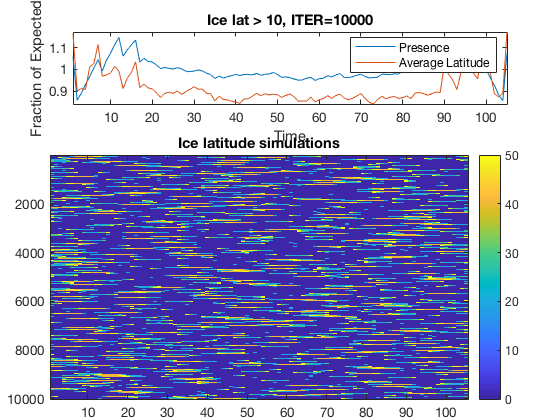

In [11]:
% Create figures to show results
figure(52) 
% Summary statistics of ice simulations
% Flat lines of ~1 are best fit with evenly distributed probabilities
% for ice through time (ie, null hypothesis)
subplot(311) 
plot(sum(all_sim)/(sum(ice_dur)/105*ITER))
hold on
plot(sum(all_lat)/(mean(icelat_real)*ITER))
hold off
axis tight
title(['Ice lat > 10, ITER=' num2str(ITER)])
xlabel('Time')
ylabel('Fraction of Expected')
legend('Presence','Average Latitude')

% Colors in each horizontal line represent ice latitude vs time for each
% simulation (should look like random noise)
subplot('Position',[.09 .05 .85 .58])
imagesc(all_lat)
colorbar
title('Ice latitude simulations')
xlabel('Time')
ylabel('Iteration')


fig = 

  Figure (58) with properties:

      Number: 58
        Name: ''
       Color: [0.9400 0.9400 0.9400]
    Position: [440 378 560 420]
       Units: 'pixels'

  Use GET to show all properties


fig = 

  Figure (58) with properties:

      Number: 58
        Name: ''
       Color: [0.9400 0.9400 0.9400]
    Position: [440 378 560 420]
       Units: 'pixels'

  Use GET to show all properties


fig = 

  Figure (58) with properties:

      Number: 58
        Name: ''
       Color: [0.9400 0.9400 0.9400]
    Position: [440 378 560 420]
       Units: 'pixels'

  Use GET to show all properties



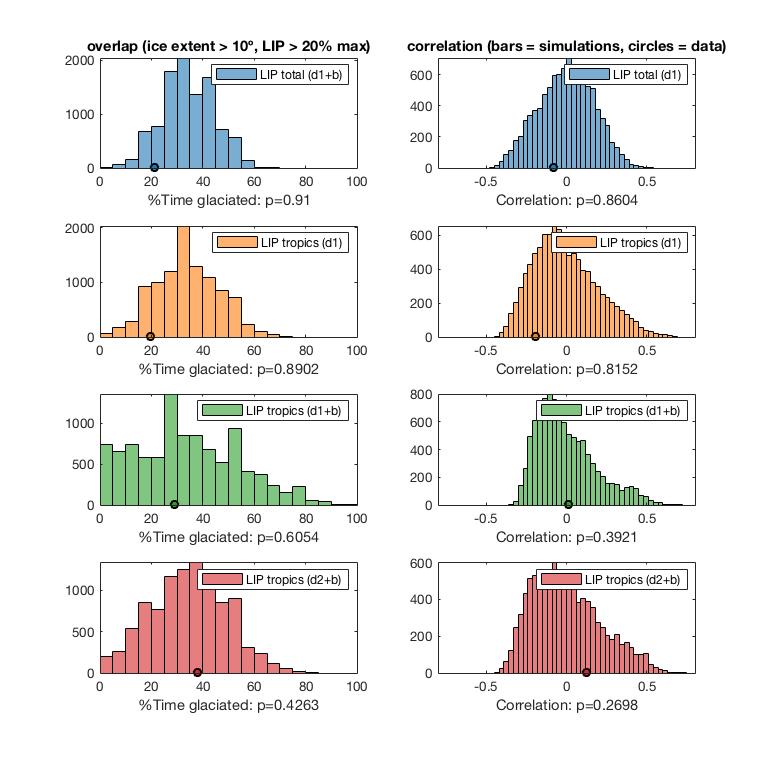

In [12]:
%%
% Histograms illustrating p-values for overlaps and correlations
figure(58)
% Display overlap as a percent of amount of time sutures are present
% because, e.g., 5-degree sutures are present/extensive for less total time 
% than 10-degree sutures
subplot(421)
histogram(100*ovlp_sim_decay1_burial_all/sum(bin_decay1_burial_all),[0:5:100],'FaceColor',col{1})
hold on
plot(100*ovlp_decay1_burial_all/sum(bin_decay1_burial_all),1,'ko','MarkerFaceColor',col{1})
hold off
axis tight
title('overlap (ice extent > 10º, LIP > 20% max)')
xlabel(['%Time glaciated: p=' num2str(p_ovlp_decay1_burial_all)])
legend('LIP total (d1+b)')

subplot(423)
histogram(100*ovlp_sim_decay1_tropical/sum(bin_decay1_tropical),[0:5:100],'FaceColor',col{2})
hold on
plot(100*ovlp_decay1_tropical/sum(bin_decay1_tropical),1,'ko','MarkerFaceColor',col{2})
hold off
axis tight
xlabel(['%Time glaciated: p=' num2str(p_ovlp_decay1_tropical)])
legend('LIP tropics (d1)')

subplot(425)
histogram(100*ovlp_sim_decay1_burial_tropical/sum(bin_decay1_burial_tropical),[0:5:100],'FaceColor',col{3})
hold on
plot(100*ovlp_decay1_burial_tropical/sum(bin_decay1_burial_tropical),1,'ko','MarkerFaceColor',col{3})
hold off
axis tight
xlabel(['%Time glaciated: p=' num2str(p_ovlp_decay1_burial_tropical)])
legend('LIP tropics (d1+b)')

subplot(427)
histogram(100*ovlp_sim_decay2_burial_tropical/sum(bin_decay2_burial_tropical),[0:5:100],'FaceColor',col{4})
hold on
plot(100*ovlp_decay2_burial_tropical/sum(bin_decay2_burial_tropical),1,'ko','MarkerFaceColor',col{4})
hold off
axis tight
xlabel(['%Time glaciated: p=' num2str(p_ovlp_decay2_burial_tropical)])
legend('LIP tropics (d2+b)')


subplot(422)
histogram(cc_sim_decay1_burial_all,'FaceColor',col{1})
hold on
plot(cc_real_decay1_burial_all,1,'ko','MarkerFaceColor',col{1})
hold off
axis tight
title('correlation (bars = simulations, circles = data)')
xlabel(['Correlation: p=' num2str(p_corr_decay1_all)])
legend('LIP total (d1)')
xlim([-.8 .8])

subplot(424)
histogram(cc_sim_decay1_tropical,'FaceColor',col{2})
hold on
plot(cc_real_decay1_tropical,1,'ko','MarkerFaceColor',col{2})
hold off
axis tight
xlabel(['Correlation: p=' num2str(p_corr_decay1_tropical)])
legend('LIP tropics (d1)')
xlim([-.8 .8])

subplot(426)
histogram(cc_sim_decay1_burial_tropical,'FaceColor',col{3})
hold on
plot(cc_real_decay1_burial_tropical,1,'ko','MarkerFaceColor',col{3})
hold off
axis tight
xlabel(['Correlation: p=' num2str(p_corr_decay1_burial_tropical)])
legend('LIP tropics (d1+b)')
xlim([-.8 .8])

subplot(428)
histogram(cc_sim_decay2_burial_tropical,'FaceColor',col{4})
hold on
plot(cc_real_decay2_burial_tropical,1,'ko','MarkerFaceColor',col{4})
hold off
axis tight
xlabel(['Correlation: p=' num2str(p_corr_decay2_burial_tropical)])
legend('LIP tropics (d2+b)')
xlim([-.8 .8])

fig = gcf
fig.PaperUnits = 'inches'
fig.PaperPosition = [0 0 8 8]
saveas(gcf,'correlation.pdf')

In [13]:
2 + 2


ans =

     4

